/var/folders/fc/fs9j8_5j73v0dccgsvwrdxmc0000gn/T/ipykernel_13776/1753574946.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


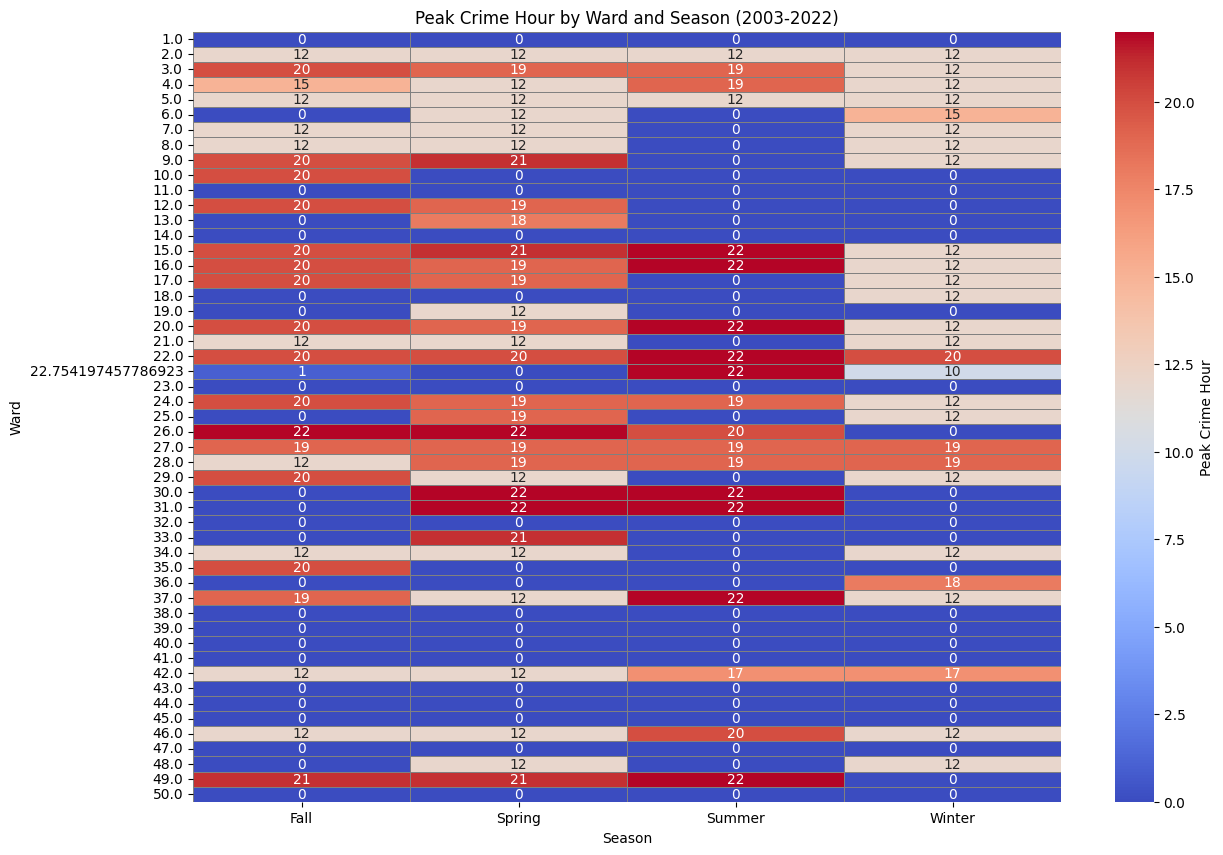

In [1]:
# 03_Ward_Peak_Times.ipynb

# --- Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load the Cleaned Data ---
df = pd.read_csv('../data/CleanedCrime.csv')
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# --- Filter to 2003-2022 ---
df = df[(df['Date'].dt.year >= 2003) & (df['Date'].dt.year <= 2022)]

# --- Create Season and Hour Columns ---
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Date'].apply(get_season)
df['Hour'] = df['Date'].dt.hour

# --- Group by Ward, Season, and Hour ---
ward_season_hour = df.groupby(['Ward', 'Season', 'Hour']).size().reset_index(name='Crime_Count')

# --- Find Peak Hour for Each Ward per Season ---
# For each Ward + Season, find the Hour with max Crime_Count
peak_times = ward_season_hour.loc[ward_season_hour.groupby(['Ward', 'Season'])['Crime_Count'].idxmax()]

# --- (Optional) Pivot for Heatmap ---
peak_pivot = peak_times.pivot(index='Ward', columns='Season', values='Hour')

# --- Plot: Heatmap of Peak Crime Hours ---
plt.figure(figsize=(14, 10))
sns.heatmap(peak_pivot, annot=True, fmt='.0f', cmap='coolwarm', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Peak Crime Hour'})
plt.title('Peak Crime Hour by Ward and Season (2003-2022)')
plt.xlabel('Season')
plt.ylabel('Ward')
plt.yticks(rotation=0)
plt.xticks(rotation=0)
plt.show()


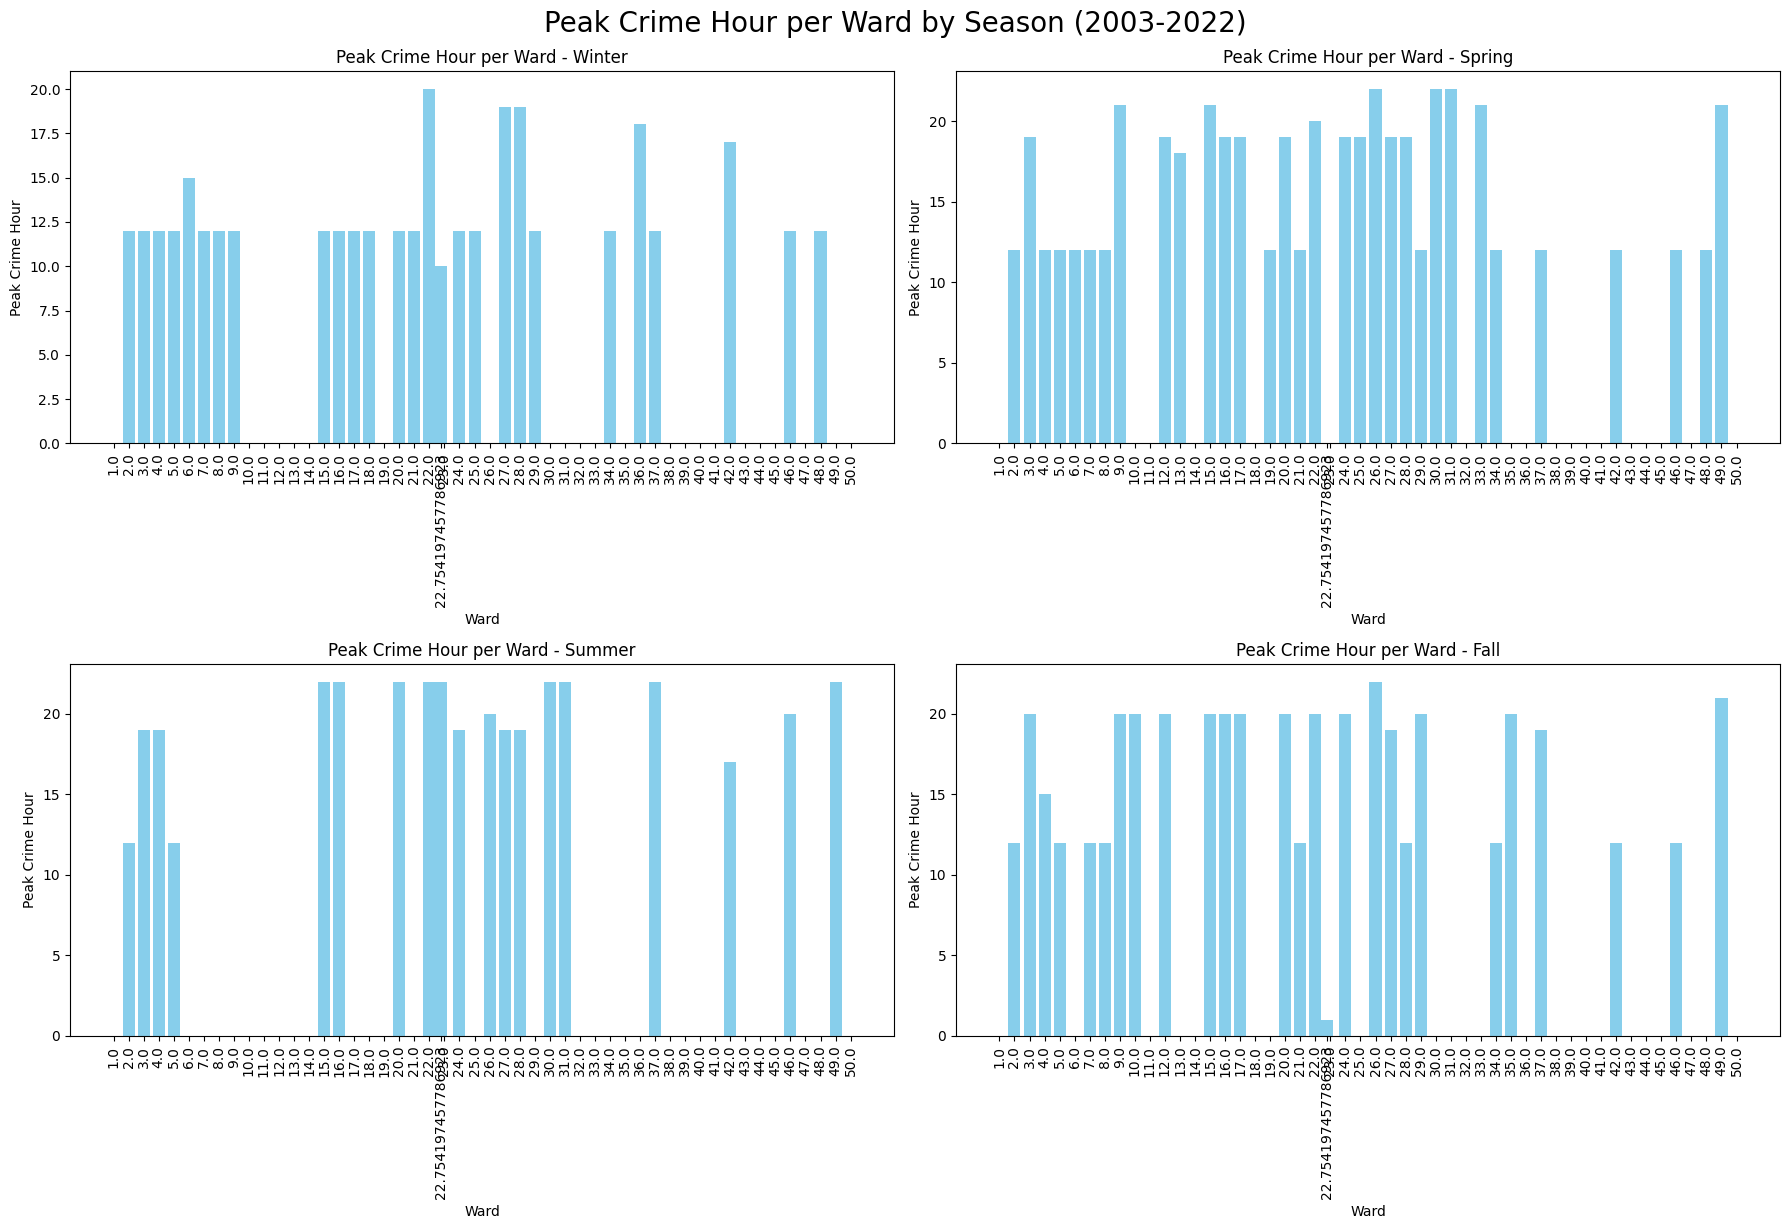

In [2]:
# --- Barplots: Peak Crime Hour per Ward by Season ---

# Set up the plot grid: 2x2 (Winter, Spring, Summer, Fall)
seasons = ['Winter', 'Spring', 'Summer', 'Fall']

fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = axs.flatten()  # Flatten 2x2 axes into a list for easy iteration

for idx, season in enumerate(seasons):
    season_data = peak_times[peak_times['Season'] == season]
    axs[idx].bar(season_data['Ward'], season_data['Hour'], color='skyblue')
    axs[idx].set_title(f'Peak Crime Hour per Ward - {season}')
    axs[idx].set_xlabel('Ward')
    axs[idx].set_ylabel('Peak Crime Hour')
    axs[idx].set_xticks(season_data['Ward'])
    axs[idx].set_xticklabels(season_data['Ward'], rotation=90)

plt.tight_layout()
plt.suptitle('Peak Crime Hour per Ward by Season (2003-2022)', fontsize=20, y=1.02)
plt.show()
